In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime
import requests

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Boston"

In [3]:
lats = np.random.uniform(-90, 90, 1500)
lngs = np.random.uniform(-180, 180, 1500)
lat_lngs = list(zip(lats, lngs))

In [4]:
cities = []
for lat, lon in lat_lngs:
    city = citipy.nearest_city(latitude=lat, longitude=lon).city_name
    if city not in cities:
        cities.append(city)

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
for index, city in enumerate(cities):
    if (index % 50 == 0 and index >= 50):
        set_count += 1
        time.sleep(60)
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print('City not found. Skipping...')

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | okha
Processing Record 4 of Set 1 | saldanha
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | kandrian
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | katsuura
Processing Record 14 of Set 1 | am timan
Processing Record 15 of Set 1 | masvingo
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | sao felix do xingu
Processing Record 18 of Set 1 | shache
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | nome
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | lucapa
Pro

In [7]:
len(city_data)

549

In [8]:
df = pd.DataFrame(city_data)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,72.68,88,62,10.16,BR,2022-07-31 17:30:38
1,New Norfolk,-42.7826,147.0587,49.50,77,96,1.01,AU,2022-07-31 17:30:39
2,Okha,53.5739,142.9478,53.24,90,37,12.37,RU,2022-07-31 17:30:39
3,Saldanha,-33.0117,17.9442,50.05,69,1,19.86,ZA,2022-07-31 17:30:39
4,Punta Arenas,-53.1500,-70.9167,44.71,70,75,11.50,CL,2022-07-31 17:30:40


In [9]:
# Reorder columns
df = df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2022-07-31 17:30:38,-17.7125,-39.2481,72.68,88,62,10.16
1,New Norfolk,AU,2022-07-31 17:30:39,-42.7826,147.0587,49.50,77,96,1.01
2,Okha,RU,2022-07-31 17:30:39,53.5739,142.9478,53.24,90,37,12.37
3,Saldanha,ZA,2022-07-31 17:30:39,-33.0117,17.9442,50.05,69,1,19.86
4,Punta Arenas,CL,2022-07-31 17:30:40,-53.1500,-70.9167,44.71,70,75,11.50


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
df.to_csv(output_data_file, index_label="City_ID")

In [11]:
lats = df["Lat"]
max_temps = df["Max Temp"]
humidity = df["Humidity"]
cloudiness = df["Cloudiness"]
wind_speed = df["Wind Speed"]

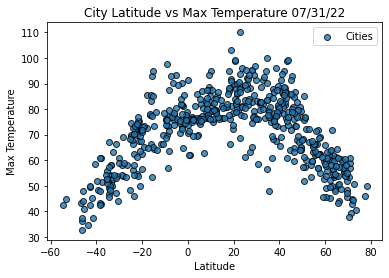

In [12]:
plt.scatter(lats,
            max_temps,
            edgecolors="black",
            linewidths=1,
            marker='o',
            alpha=.8,
            label='Cities')
plt.legend()
plt.title('City Latitude vs Max Temperature ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.savefig("weather_data/Fig1.png")
plt.show()

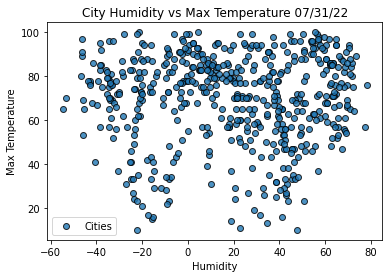

In [13]:
plt.scatter(lats,
            humidity,
            edgecolors="black",
            linewidths=1,
            marker='o',
            alpha=.8,
            label='Cities')
plt.legend()
plt.title('City Humidity vs Max Temperature ' + time.strftime('%x'))
plt.xlabel('Humidity')
plt.ylabel('Max Temperature')
plt.savefig("weather_data/Fig1.png")
plt.show()

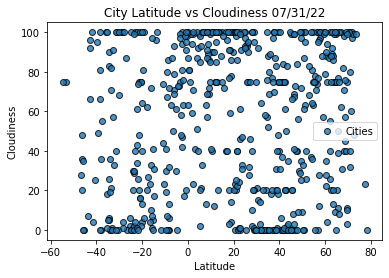

In [14]:
plt.scatter(lats,
            cloudiness,
            edgecolors="black",
            linewidths=1,
            marker='o',
            alpha=.8,
            label='Cities')
plt.legend()
plt.title('City Latitude vs Cloudiness ' + time.strftime('%x'))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("weather_data/Fig1.png")
plt.show()

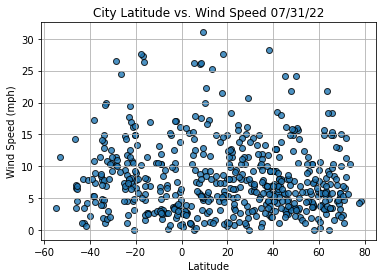

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

In [18]:
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [19]:
regression_values = [lats*slope + intercept for lats in lats]

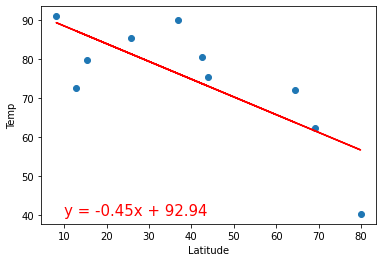

In [28]:
plt.scatter(lats, temps)
plt.plot(lats, regression_values, color='red')
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [45]:
def plot_linear_regression(x_values, y_values, y_label, text_coordinates, title):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [43]:
northern_hemi_df = df.loc[df['Lat'] > 0]
southern_hemi_df = df.loc[(df["Lat"] < 0)]

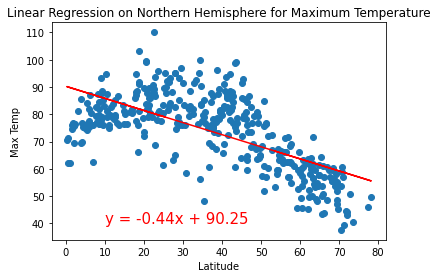

In [47]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', (10,40),'Linear Regression on Northern Hemisphere for Maximum Temperature')

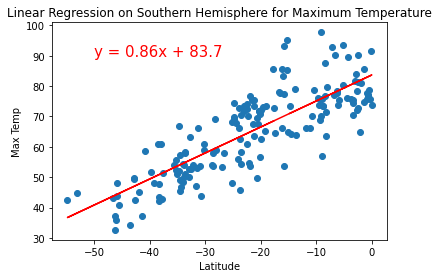

In [53]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', (-50,90),'Linear Regression on Southern Hemisphere for Maximum Temperature')

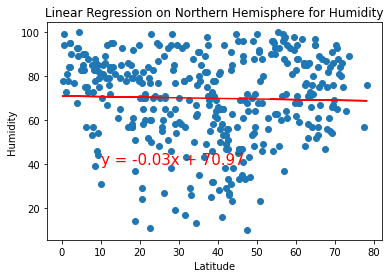

In [61]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', (10,40),'Linear Regression on Northern Hemisphere for Humidity')

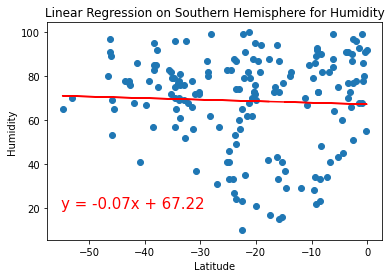

In [60]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', (-55,20),'Linear Regression on Southern Hemisphere for Humidity')

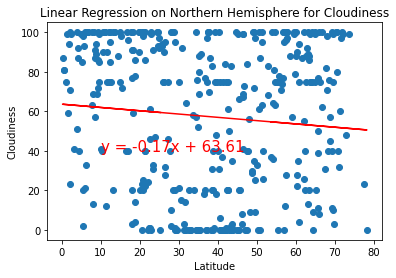

In [62]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', (10,40),'Linear Regression on Northern Hemisphere for Cloudiness')

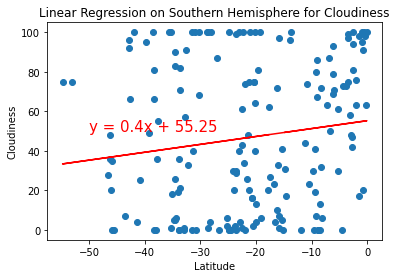

In [70]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', (-50,50),'Linear Regression on Southern Hemisphere for Cloudiness')

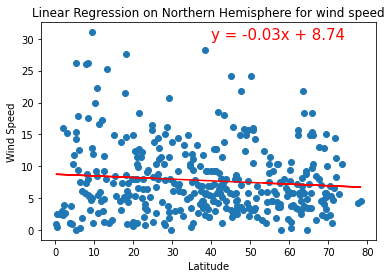

In [79]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', (40,30),'Linear Regression on Northern Hemisphere for wind speed')

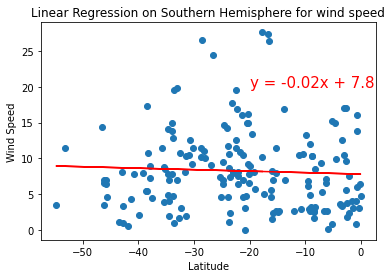

In [91]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', (-20,20),'Linear Regression on Southern Hemisphere for wind speed')

In [92]:
import gmaps